In [3]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
admission = pd.read_csv("admission_pred.csv")
admission = admission.drop("Serial No.", axis = 1)
admission.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x698d3230>,
      dtype=object)

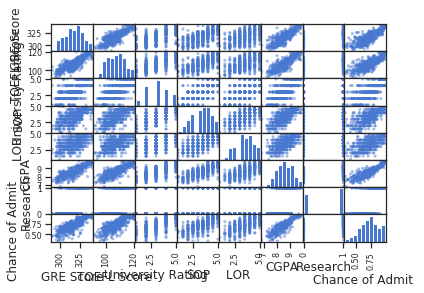

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style = "ticks", palette = "muted")
scatter_matrix(admission)

From this scatter plot we can say that the CGPA, GRE score and TOEFL score are the most linearly correlated features with the target. Showing that with higher CGPA and higher GRE and TOEFL scores, chance of admission increases.

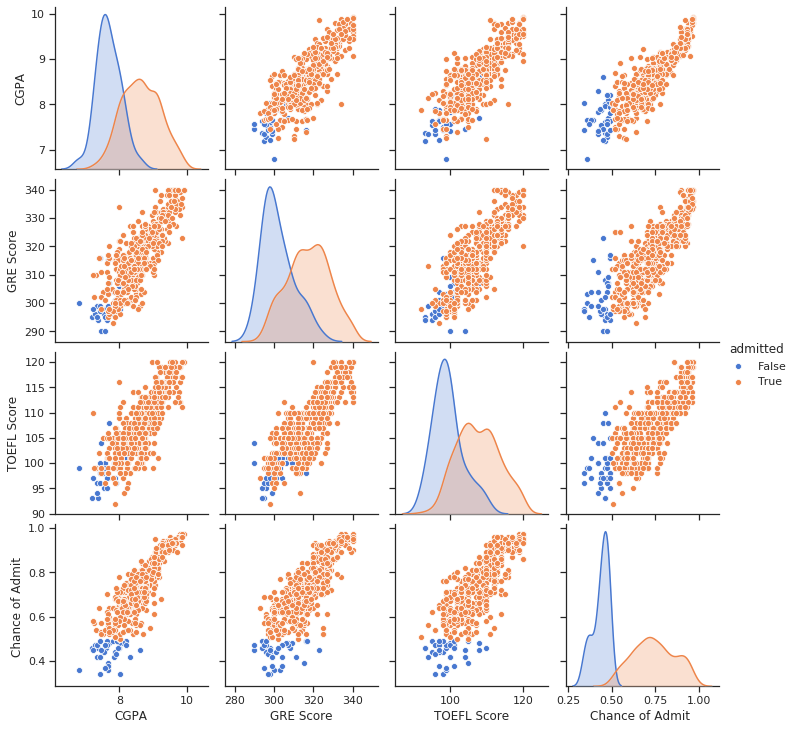

In [6]:
admission["admitted"] = admission["Chance of Admit "] >= 0.5
sns.pairplot(admission[["CGPA", "GRE Score", "TOEFL Score", "Chance of Admit ", "admitted"]], hue = "admitted")

From the pairplot of these values(CGPA, GRE score and TOEFL score) with the target(Chance of Admission), we can see that they are all well positively correlated with the chance of admission.
Using 0.5 as the threshold for admission, we can see that most of the students have greater than 0.5 and would be admitted.
True: admitted
False: not admitted
*based on a threshold 0.5

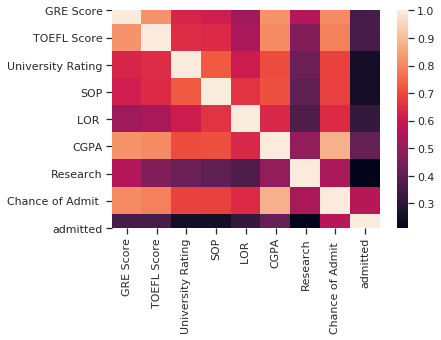

In [7]:
correlation = admission.corr()
sns.heatmap(correlation)

From the heatmap we can also confirm that the most correlated features with the target include CGPA, GRE score and TOEFL score.
We can also note that there are no negatively correlated features with the target.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scale = StandardScaler()
scaled_admission = scale.fit_transform(admission)
scaled_admission = pd.DataFrame(scaled_admission, columns = admission.columns)

features = scaled_admission[["CGPA", "GRE Score", "TOEFL Score"]].values
target = admission["Chance of Admit "].values

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 1)

/data/user/0/ru.iiec.pydroid3/files/arm-linux-androideabi/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/data/user/0/ru.iiec.pydroid3/files/arm-linux-androideabi/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


The target, Chance of dmission is a continuous variable and as such a regression model would suffice.
A linear regression model, utilizing the method of least squares, would be sufficient for training the data set.